In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import eigdec

In [2]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["green"]))

In [3]:
# Load image
img_raw = imread('src/shrek.jpeg')
img_raw.shape  # (height, width, color channels)

(408, 408, 3)

In [4]:
img_sum = img_raw.sum(axis=2)  # From 3 color channels to 1 (greyscale)
img_bw = img_sum / img_sum.max()  # Normalize to [0, 1]
*img_bw.shape, int(img_bw.max())  # (height, width, color channels)

(408, 408, 1)

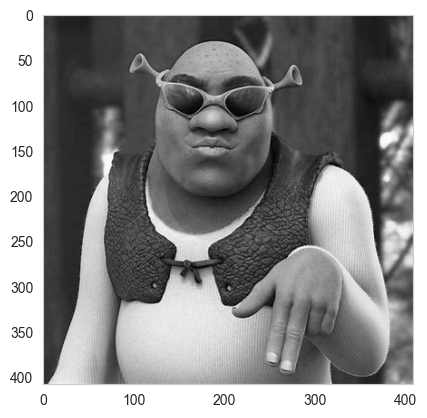

In [5]:
plt.imshow(img_bw, cmap='gray')
plt.grid(False)

Text(0, 0.5, 'Cumulative explained variance')

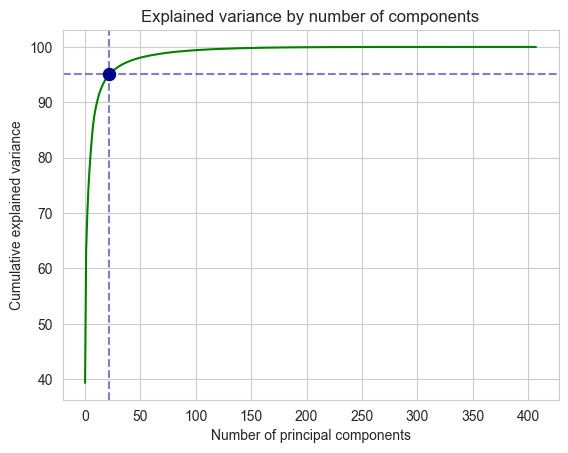

In [14]:
img_mean = np.mean(img_bw, axis=0)
img_centered = img_bw - img_mean  # Center the data
covar_matrix = np.cov(img_centered, rowvar=False)  # Covariance matrix
covar_eigenvalues, covar_eigenvectors = eigdec.find_eigenvalues_and_vectors(covar_matrix)  # Eigenvectors - components

eigenvalues_var = (covar_eigenvalues / covar_eigenvalues.sum()) * 100  # Variance explained by each component
cumulative_var = np.cumsum(eigenvalues_var)  # Cumulative variance explained by components
opt_components_num = np.argmax(cumulative_var > 95)  # returns the 1st index with a value > 95

sns.lineplot(x=[i for i in range(len(covar_eigenvectors))],y=cumulative_var)
plt.scatter(opt_components_num, cumulative_var[opt_components_num], color='darkblue', s=75, zorder=3)
plt.axvline(opt_components_num, color='darkblue', linestyle='--', alpha=0.5)
plt.axhline(cumulative_var[opt_components_num], color='darkblue', linestyle='--', alpha=0.5)
plt.title("Explained variance by number of components")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")

In [15]:
opt_components_num  # number of components that explain 95% of the variance

22

In [16]:
sorting_indices = np.argsort(covar_eigenvalues)[::-1]  # descending order
sorted_covar_eigenvectors = covar_eigenvectors[sorting_indices]
principal_components_opt = sorted_covar_eigenvectors[:, :opt_components_num]

reconstruct_img = lambda components: np.dot(np.dot(components.T, img_centered.T).T, components.T) + img_mean

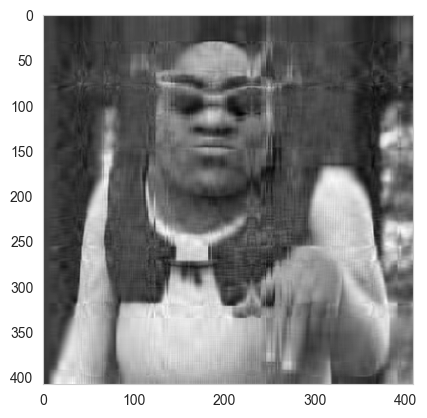

In [17]:
img_reconstructed_opt = reconstruct_img(principal_components_opt)
plt.imshow(img_reconstructed_opt, cmap='gray')
plt.grid(False)

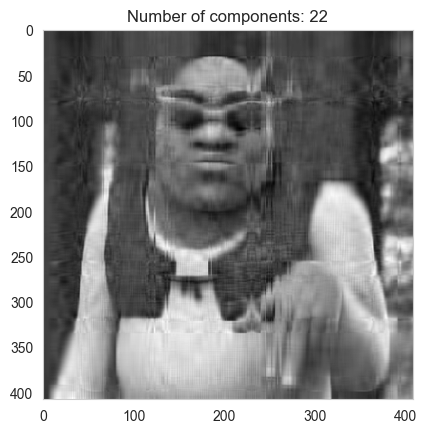

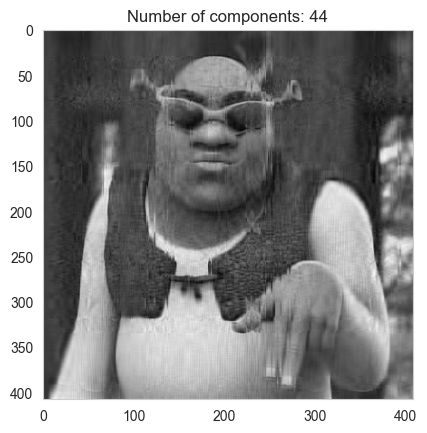

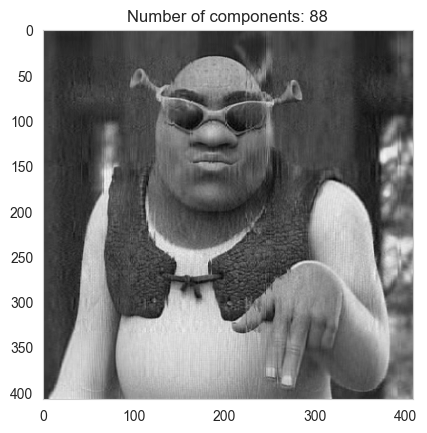

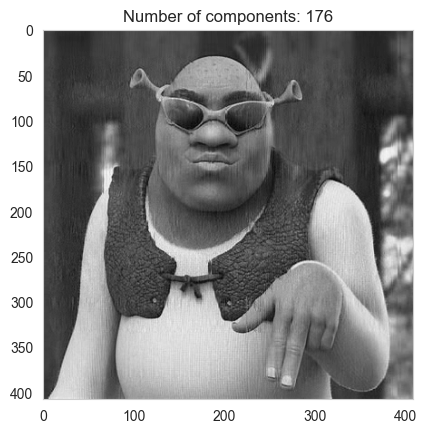

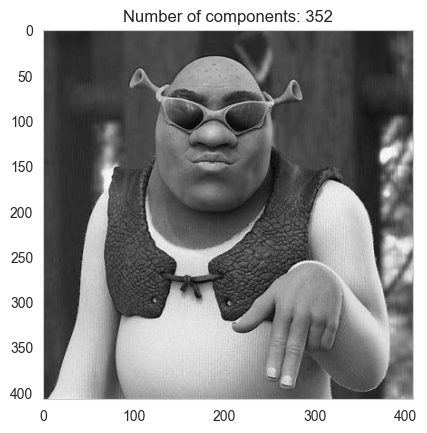

In [18]:
# Gradually increase components number
components_num = opt_components_num
while components_num <= img_bw.shape[1]:
    img_reconstructed = reconstruct_img(sorted_covar_eigenvectors[:, :components_num])
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title(f"Number of components: {components_num}")
    plt.grid(False)
    plt.show()
    components_num *= 2